In [1]:
from pathlib import Path
from instance_dac.utils.data_loading import load_performance_data
import pandas as pd
import numpy as np
from rliable import library as rly
from rliable import metrics
from rliable import plot_utils


path = Path("../runs/CMA-ES/default/sac_sb3/full")

data = load_performance_data(path, search_prefix="/train/**/")
data["origin"] = "random"

perf = pd.DataFrame(data.groupby(["origin", "seed", "instance"])["overall_performance"].mean())
perf_dict = {}
for gid, gdf in perf.groupby("origin"):
    gdf = gdf.reset_index()
    P = gdf["overall_performance"].to_numpy()
    P = P.reshape((gdf["seed"].nunique(), gdf["instance"].nunique()))
    perf_dict[gid] = P




algorithms = list(perf_dict.keys())
# Load ALE scores as a dictionary mapping algorithms to their human normalized
# score matrices, each of which is of size `(num_runs x num_games)`.
aggregate_func = lambda x: np.array([
  metrics.aggregate_median(x),
  metrics.aggregate_iqm(x),
  metrics.aggregate_mean(x),
  metrics.aggregate_optimality_gap(x)])
aggregate_scores, aggregate_score_cis = rly.get_interval_estimates(
  perf_dict, aggregate_func, reps=5000)
fig, axes = plot_utils.plot_interval_estimates(
  aggregate_scores, aggregate_score_cis,
  metric_names=['Median', 'IQM', 'Mean', 'Optimality Gap'],
  algorithms=algorithms, xlabel='Overall Performance')

/scratch/hpc-prf-intexml/cbenjamins/envs/instancedac/lib/python3.11/site-packages/glfw/__init__.py:916: GLFWError: (65544) b'X11: The DISPLAY environment variable is missing'
  warnings.warn(message, GLFWError)


pygame 2.5.2 (SDL 2.28.2, Python 3.11.6)
Hello from the pygame community. https://www.pygame.org/contribute.html


/scratch/hpc-prf-intexml/cbenjamins/repos/instance-dac/DACBench/dacbench/envs/__init__.py:46: UserWarning: SGD Benchmark not installed. If you want to use this benchmark, please follow the installation guide.
  warnings.warn(
/scratch/hpc-prf-intexml/cbenjamins/repos/instance-dac/DACBench/dacbench/benchmarks/__init__.py:37: UserWarning: SGD Benchmark not installed. If you want to use this benchmark, please follow the installation guide.
  warnings.warn(


DACBench Gym registration failed - make sure you have all dependencies installed and their instance sets in the right path!


Output()

[PosixPath('../runs/CMA-ES/default/sac_sb3/full/9/logs/train/PerformanceTrackingWrapper.jsonl'), PosixPath('../runs/CMA-ES/default/sac_sb3/full/8/logs/train/PerformanceTrackingWrapper.jsonl'), PosixPath('../runs/CMA-ES/default/sac_sb3/full/6/logs/train/PerformanceTrackingWrapper.jsonl'), PosixPath('../runs/CMA-ES/default/sac_sb3/full/10/logs/train/PerformanceTrackingWrapper.jsonl'), PosixPath('../runs/CMA-ES/default/sac_sb3/full/3/logs/train/PerformanceTrackingWrapper.jsonl'), PosixPath('../runs/CMA-ES/default/sac_sb3/full/5/logs/train/PerformanceTrackingWrapper.jsonl'), PosixPath('../runs/CMA-ES/default/sac_sb3/full/7/logs/train/PerformanceTrackingWrapper.jsonl'), PosixPath('../runs/CMA-ES/default/sac_sb3/full/2/logs/train/PerformanceTrackingWrapper.jsonl'), PosixPath('../runs/CMA-ES/default/sac_sb3/full/4/logs/train/PerformanceTrackingWrapper.jsonl'), PosixPath('../runs/CMA-ES/default/sac_sb3/full/1/logs/train/PerformanceTrackingWrapper.jsonl')]


ValueError: Index contains duplicate entries, cannot reshape

[PosixPath('../runs/CMA-ES/seplow_train/ppo_sb3/full/9/logs/train/PerformanceTrackingWrapper.jsonl'), PosixPath('../runs/CMA-ES/seplow_train/ppo_sb3/full/9/logs/eval/train/PerformanceTrackingWrapper.jsonl'), PosixPath('../runs/CMA-ES/seplow_train/ppo_sb3/full/8/logs/train/PerformanceTrackingWrapper.jsonl'), PosixPath('../runs/CMA-ES/seplow_train/ppo_sb3/full/8/logs/eval/train/PerformanceTrackingWrapper.jsonl'), PosixPath('../runs/CMA-ES/seplow_train/ppo_sb3/full/6/logs/train/PerformanceTrackingWrapper.jsonl'), PosixPath('../runs/CMA-ES/seplow_train/ppo_sb3/full/6/logs/eval/train/PerformanceTrackingWrapper.jsonl'), PosixPath('../runs/CMA-ES/seplow_train/ppo_sb3/full/10/logs/train/PerformanceTrackingWrapper.jsonl'), PosixPath('../runs/CMA-ES/seplow_train/ppo_sb3/full/10/logs/eval/train/PerformanceTrackingWrapper.jsonl'), PosixPath('../runs/CMA-ES/seplow_train/ppo_sb3/full/3/logs/train/PerformanceTrackingWrapper.jsonl'), PosixPath('../runs/CMA-ES/seplow_train/ppo_sb3/full/3/logs/eval/trai

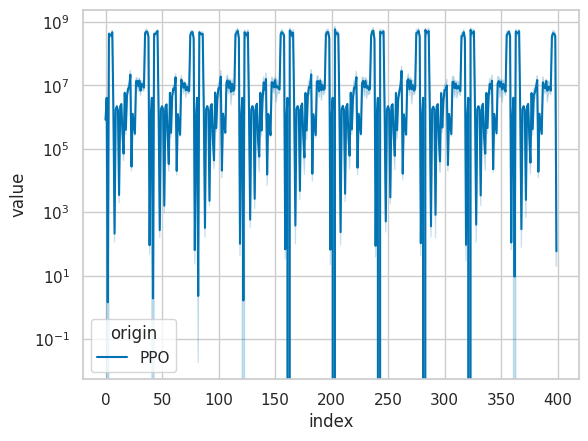

In [23]:
from dacbench.logger import load_logs, log2dataframe
from multiprocessing import Pool
import pandas as pd
import seaborn as sns

sns.set_style("whitegrid")
sns.set_palette("colorblind")


paths = {
    "PPO": "../runs/CMA-ES/seplow_train/ppo_sb3/full",
    # "SAC": "../runs/CMA-ES/seplow_train/sac_sb3/full"
}

dfs = []
for name, path in paths.items():
    path = Path(path)
    filenames = list(path.glob(f"**/train/PerformanceTrackingWrapper.jsonl"))
    print(filenames)

    def load(filename: str) -> pd.DataFrame:
        drop_columns = ["step", "episode", "instance"]
        logs = load_logs(filename)
        data = log2dataframe(logs, wide=False, drop_columns=drop_columns)
        data["time"] = data["time"] - data["time"].iloc[0]
        data = data.reset_index()
        return data

    with Pool() as pool:
        df = pool.map(load, filenames)
    df = pd.concat(df)
    df["origin"] = name
    dfs.append(df)
df = pd.concat(dfs)
del dfs

df["value"] = -df["value"]

ax = sns.lineplot(data=df, x="index", y="value", hue="origin")
ax.set_yscale("log")


In [21]:
import numpy as np
np.sum(df.groupby(["value"] == 0)

210